In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
import empyrical
%matplotlib inline

In [31]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [102]:
# allocation = pd.read_excel('../data/1090_all_wgts.xlsx')
# allocation = pd.read_excel('../data/2080_all_wgts.xlsx')
# allocation = pd.read_excel('../data/3070_all_wgts.xlsx')
allocation = pd.read_excel('../data/4060_all_wgts.xlsx')

In [103]:
allocation.head()

,cn_equity_li,cn_bond_li,cn_equity_li2,cn_bond_li2
2013-01-04,0.369000,0.631000,0.459000,0.541000
2013-01-07,0.368906,0.631094,0.458900,0.541100
2013-01-08,0.370069,0.629931,0.460139,0.539861
2013-01-09,0.369782,0.630218,0.459834,0.540166
2013-01-10,0.369860,0.630140,0.459917,0.540083


In [104]:
# allocation = allocation[allocation.index >= '2014-05-01']

In [105]:
allocation.shape[0]

1785

In [106]:
start_date, end_date = allocation.index[0], allocation.index[-1]

In [107]:
allocation['cn_equity_li'].max()

0.5299831720426249

In [108]:
st_codes = '070002.OF,070013.OF'
data = w.wsd(st_codes, 'nav_adj', start_date, end_date)

In [109]:
st_price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [110]:
st_ret = st_price.pct_change().mean(axis=1)

In [111]:
st_ret.shape[0]

1785

In [112]:
empyrical.annual_return(st_ret)

0.1587975467795928

In [113]:
bd_codes = 'CBA01231.CS'
data = w.wsd(bd_codes, 'close', start_date, end_date)

In [114]:
bd_price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [115]:
bd_ret = bd_price.pct_change().mean(axis=1)

In [116]:
bd_ret.shape[0]

1785

In [117]:
empyrical.annual_return(bd_ret)

0.0522495838674073

In [131]:
# pf_ret = allocation['cn_equity_li'] * st_ret + allocation['cn_bond_li'] * bd_ret
pf_ret = st_ret

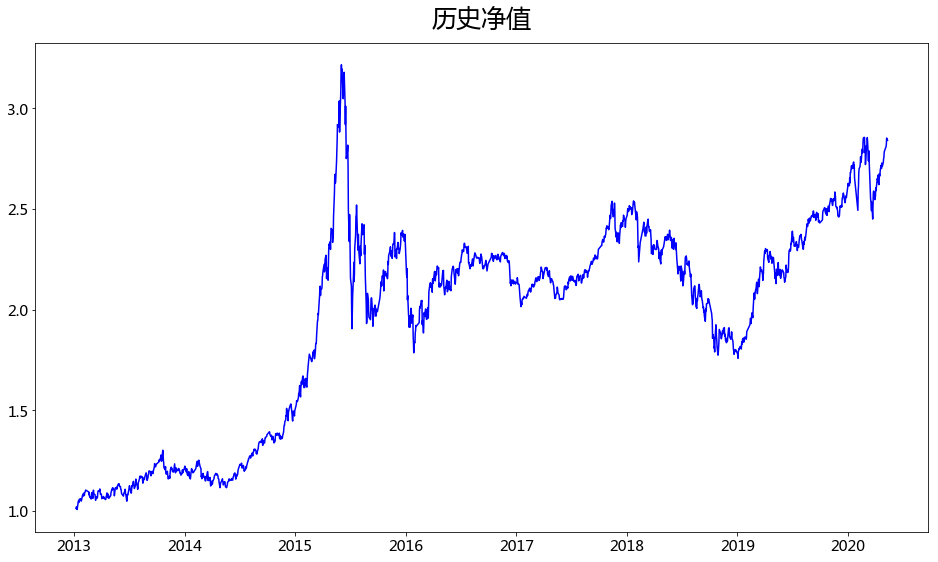

In [132]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret).cumprod(), color='blue')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
_ = ax.set_title(u'历史净值', fontsize=25, y=1.02)

In [133]:
empyrical.annual_return(pf_ret)

0.1587975467795928

In [134]:
empyrical.max_drawdown(pf_ret)

-0.4533813538259787

In [135]:
empyrical.annual_volatility(pf_ret)

0.2272663007256246

In [136]:
empyrical.sharpe_ratio(pf_ret)

0.76327347325748

In [124]:
pf_ret_1y = pf_ret.rolling(window=243).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243)
pf_ret_2y = pf_ret.rolling(window=243*2).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*2)
pf_ret_3y = pf_ret.rolling(window=243*3).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*3)
pf_ret_4y = pf_ret.rolling(window=243*4).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*4)
pf_ret_5y = pf_ret.rolling(window=243*5).apply(lambda x: empyrical.annual_return(x), raw=True).shift(-243*5)

In [24]:
target = 0.04

# 持有期1年

In [25]:
pf_ret_1y[pf_ret_1y > target].size / pf_ret_1y.dropna().size

0.6316472114137484

In [245]:
pf_ret.rolling(window=243).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.022305637851935844

In [246]:
pf_ret_1y.max()

0.537991348454371

In [247]:
pf_ret_1y.min()

-0.09646310425618576

In [248]:
pf_ret_1y.sort_values().quantile([0.2])

0.2    0.003855
dtype: float64

In [249]:
pf_ret_1y.median()

0.059716123122859566

# 持有期2年

In [250]:
pf_ret_2y[pf_ret_2y > target].size / pf_ret_2y.dropna().size

0.655421686746988

In [251]:
pf_ret.rolling(window=243*2).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.0635519009141295

In [252]:
pf_ret_2y.max()

0.26180976367072173

In [253]:
pf_ret_2y.min()

-0.04157096355926915

In [254]:
pf_ret_2y.sort_values().quantile([0.2])

0.2    0.024945
dtype: float64

In [255]:
pf_ret_2y.median()

0.05250546781575327

# 持有期3年

In [256]:
pf_ret_3y[pf_ret_3y > target].size / pf_ret_3y.dropna().size

0.6047904191616766

In [257]:
pf_ret.rolling(window=243*3).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.06948846752568517

In [258]:
pf_ret_3y.max()

0.16670316045279732

In [259]:
pf_ret_3y.min()

-0.012227079976126043

In [260]:
pf_ret_3y.sort_values().quantile([0.2])

0.2    0.025609
dtype: float64

In [261]:
pf_ret_3y.median()

0.08719132879679237

# 持有期4年

In [262]:
pf_ret_4y[pf_ret_4y > target].size / pf_ret_4y.dropna().size

0.8287220026350461

In [263]:
pf_ret.rolling(window=243*4).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.11115490742614138

In [264]:
pf_ret_4y.max()

0.12806459021294958

In [265]:
pf_ret_4y.min()

0.005276620093678019

In [266]:
pf_ret_4y.sort_values().quantile([0.2])

0.2    0.041713
dtype: float64

In [267]:
pf_ret_4y.median()

0.09695662354477985

# 持有期5年

In [268]:
pf_ret_5y[pf_ret_5y > target].size / pf_ret_5y.dropna().size

1.0

In [269]:
pf_ret.rolling(window=243*5).apply(lambda x: empyrical.max_drawdown(x), raw=True).max()

-0.11992668057627481

In [270]:
pf_ret_5y.max()

0.11516877655413582

In [271]:
pf_ret_5y.min()

0.06616195455458262

In [272]:
pf_ret_5y.sort_values().quantile([0.2])

0.2    0.077991
dtype: float64

In [273]:
pf_ret_5y.median()

0.08949501701409912